In [33]:
import pandas_datareader.data as pdr
import pandas as pd
import datetime as dt
import math
import yfinance as yf
import matplotlib.pyplot as plt

yf.pdr_override()

# Trading on Price

In [2]:
# step1: get and organize data
# step2: Run algorithm
# step3: Calculate/Analyze Return vs Benchmark(s)
# step4: Test inputs/Tweak Strategy

In [3]:
def cagr(_df):
    df = _df.copy()
    df.sort_index(ascending=True)
    df['cum_return'] = (1+ df['return']).cumprod()
    total_ret = df['cum_return'][-1]
    start = dt.datetime(1970, 1, 1) + dt.timedelta(seconds=df.index[0].timestamp())
    end =  dt.datetime(1970, 1, 1) + dt.timedelta(seconds=df.index[-1].timestamp())
    total_period = (end-start).days / 365.25
    CAGR = (total_ret) ** (1/total_period) -1
    return CAGR

In [4]:
def volatility(_df):
    df = _df.copy()
    start = dt.datetime(1970, 1, 1) + dt.timedelta(seconds=df.index[0].timestamp())
    end =  dt.datetime(1970, 1, 1) + dt.timedelta(seconds=df.index[-1].timestamp())
    period_years = (end-start).days / 365.25
    ratio_to_annual = df['return'].count() / period_years
    vol = df['return'].std() * math.sqrt(ratio_to_annual)
    return vol

In [5]:
def sharpe(_df, risk_free_rate=0.0544381):
    df = _df.copy()
    ret = cagr(df)
    vol = volatility(df)
    sharpe = (ret - risk_free_rate)/vol
    return sharpe

In [6]:
def max_drawdown(_df):
    df = _df.copy()
    df = df.sort_index(ascending=True)
    df['cum_return'] = (1+ df['return']).cumprod()
    df['cum_return_max'] = df['cum_return'].cummax()
    df['drawdown'] = df['cum_return_max'] - df['cum_return']
    df['drawdown_pct'] = df['drawdown'] / df ['cum_return_max']
    max_dd = df.loc[df['drawdown_pct'].idxmax()]
    return {
        'drawdown': max_dd['drawdown_pct'],
        'date': max_dd.name
    }

## step 1: Get and organize data

In [7]:
sp500_ticker = yf.Ticker('^GSPC')
df = sp500_ticker.history(period='max')[['Close']]
df.sample(5)

,Close
Date,
1981-09-18 00:00:00-04:00,116.260002
1982-01-26 00:00:00-05:00,115.190002
1957-05-10 00:00:00-04:00,46.590000
2019-04-23 00:00:00-04:00,2933.679932
2022-03-29 00:00:00-04:00,4631.600098


we want to calculate the price change in different timeframes and take action accordingly

In [8]:
df['1_day_ret'] = df['Close'].pct_change() # 1 day change
df['1_day_prev_chng'] = df['Close'].pct_change().shift(1) # basically 2 day change
df['5_day_prev_chng'] = df['Close'].pct_change(5).shift(1) # PAST 5 day change
df['30_day_prev_chng'] = df['Close'].pct_change(30).shift(1) # PAST 30 day change
df[50:60]

,Close,1_day_ret,1_day_prev_chng,5_day_prev_chng,30_day_prev_chng
Date,,,,,
1928-03-14 00:00:00-05:00,17.930000,0.000558,-0.004444,0.014148,0.013002
1928-03-15 00:00:00-05:00,18.070000,0.007808,0.000558,0.019909,0.025157
1928-03-16 00:00:00-05:00,18.260000,0.010515,0.007808,0.024376,0.028458
1928-03-19 00:00:00-05:00,18.360001,0.005476,0.010515,0.018405,0.041643
1928-03-20 00:00:00-05:00,18.459999,0.005447,0.005476,0.020000,0.041407
1928-03-21 00:00:00-05:00,18.650000,0.010293,0.005447,0.030134,0.060920
1928-03-22 00:00:00-05:00,18.600000,-0.002681,0.010293,0.040156,0.068768
1928-03-23 00:00:00-05:00,18.780001,0.009677,-0.002681,0.029330,0.066514
1928-03-26 00:00:00-05:00,19.049999,0.014377,0.009677,0.028478,0.073756


In [9]:
df.head(20)

,Close,1_day_ret,1_day_prev_chng,5_day_prev_chng,30_day_prev_chng
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,NaN,NaN,NaN,NaN
1928-01-03 00:00:00-05:00,17.760000,0.005663,NaN,NaN,NaN
1928-01-04 00:00:00-05:00,17.719999,-0.002252,0.005663,NaN,NaN
1928-01-05 00:00:00-05:00,17.549999,-0.009594,-0.002252,NaN,NaN
1928-01-06 00:00:00-05:00,17.660000,0.006268,-0.009594,NaN,NaN
1928-01-09 00:00:00-05:00,17.500000,-0.009060,0.006268,NaN,NaN
1928-01-10 00:00:00-05:00,17.370001,-0.007429,-0.009060,-0.009060,NaN
1928-01-11 00:00:00-05:00,17.350000,-0.001151,-0.007429,-0.021959,NaN
1928-01-12 00:00:00-05:00,17.469999,0.006916,-0.001151,-0.020880,NaN


In [10]:
#Step2: run algorithm

def my_strategy(_df, gt_5):
    """ checking to see 5 day prev change, if its greater than gt_5,
    it means overbought and we sell it that day. and buy in again the next day
    if it's not, we keep the stock as is.
    """
    df = _df.copy()

    for x in df.index:
        row = df.loc[x]
        if row['5_day_prev_chng'] > gt_5:
            df.at[x, 'return'] = 0
        else:
            df.at[x, 'return'] = row['1_day_ret']
    return df
        

In [11]:
strategy_returns = my_strategy(df, 0.08)

In [17]:
strategy_returns[100:120]

,Close,1_day_ret,1_day_prev_chng,5_day_prev_chng,30_day_prev_chng,return
Date,,,,,,
1928-05-24 00:00:00-04:00,19.870001,0.006076,0.020145,-0.014963,0.015946,0.006076
1928-05-25 00:00:00-04:00,19.900000,0.001510,0.006076,-0.012425,0.023699,0.001510
1928-05-28 00:00:00-04:00,19.570000,-0.016583,0.001510,-0.001004,0.008616,-0.016583
1928-05-29 00:00:00-04:00,19.820000,0.012775,-0.016583,-0.003057,-0.005589,0.012775
1928-05-31 00:00:00-04:00,20.000000,0.009082,0.012775,0.023760,0.015369,0.009082
1928-06-01 00:00:00-04:00,20.070000,0.003500,0.009082,0.012658,0.024590,0.003500
1928-06-04 00:00:00-04:00,19.799999,-0.013453,0.003500,0.010065,0.022415,-0.013453
1928-06-05 00:00:00-04:00,19.850000,0.002525,-0.013453,-0.005025,0.023785,0.002525
1928-06-06 00:00:00-04:00,19.660000,-0.009572,0.002525,0.014308,0.036554,-0.009572


In [18]:
sharpe(strategy_returns, 0.02)

0.2327959991062934

In [14]:
cagr(strategy_returns)

0.06328711203299986

In [15]:
max_drawdown(strategy_returns)

{'drawdown': 0.8559927219130424,
 'date': Timestamp('1932-06-01 00:00:00-0400', tz='America/New_York')}

## step 3: calculate benchmarks

In [20]:
sp500 = sp500_ticker.history(period='max')[['Close']]
sp500['return'] = sp500['Close'].pct_change()
sharpe(sp500, 0.02)

0.20837718461488264

In [21]:
cagr(sp500)

0.05955648177622952

In [22]:
max_drawdown(sp500)

{'drawdown': 0.86189579375156,
 'date': Timestamp('1932-06-01 00:00:00-0400', tz='America/New_York')}

## step 4: tweak strategy

In [30]:
max_result = 0
max_result_input = None
result_df = pd.DataFrame(columns=('input', 'result'))

for x in range(0, 100):
    i = x * 0.2/100 - 0.1 
    strategy_returns = my_strategy(df, i)
    result = cagr(strategy_returns)
    print(f"input: {i:.4f} = {result:.4f}")
    result_df.loc[x] = [i, result]
    if result > max_result:
        max_result = result
        max_result_input = i

print('max result: ', max_result)
print('max result input: ', max_result_input)

input: -0.1000 = 0.0048
input: -0.0980 = 0.0065
input: -0.0960 = 0.0074
input: -0.0940 = 0.0068
input: -0.0920 = 0.0057
input: -0.0900 = 0.0048
input: -0.0880 = 0.0056
input: -0.0860 = 0.0040
input: -0.0840 = 0.0047
input: -0.0820 = 0.0065
input: -0.0800 = 0.0074
input: -0.0780 = 0.0034
input: -0.0760 = 0.0053
input: -0.0740 = 0.0079
input: -0.0720 = 0.0082
input: -0.0700 = 0.0084
input: -0.0680 = 0.0072
input: -0.0660 = 0.0057
input: -0.0640 = 0.0045
input: -0.0620 = 0.0065
input: -0.0600 = 0.0057
input: -0.0580 = 0.0071
input: -0.0560 = 0.0095
input: -0.0540 = 0.0108
input: -0.0520 = 0.0081
input: -0.0500 = 0.0053
input: -0.0480 = 0.0046
input: -0.0460 = 0.0063
input: -0.0440 = 0.0029
input: -0.0420 = 0.0056
input: -0.0400 = 0.0041
input: -0.0380 = 0.0066
input: -0.0360 = 0.0058
input: -0.0340 = 0.0066
input: -0.0320 = 0.0042
input: -0.0300 = 0.0042
input: -0.0280 = 0.0020
input: -0.0260 = 0.0021
input: -0.0240 = -0.0028
input: -0.0220 = 0.0004
input: -0.0200 = -0.0014
input: -0.0180

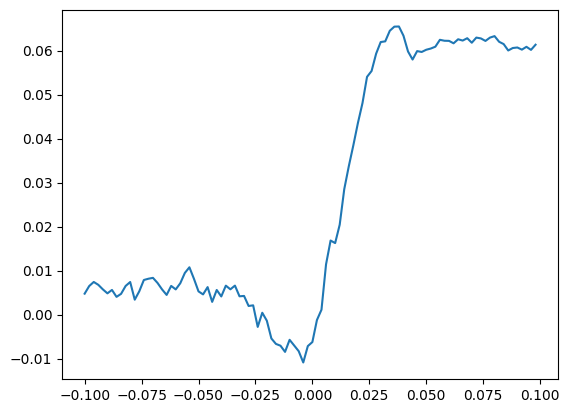

In [37]:
plt.plot(result_df['input'], result_df['result'])

In [40]:
result_df

,input,result
0,-0.100,0.004764
1,-0.098,0.006495
2,-0.096,0.007425
3,-0.094,0.006775
4,-0.092,0.005740
...,...,...
95,0.090,0.060706
96,0.092,0.060218
97,0.094,0.060860
98,0.096,0.060164
